In [56]:
# by Joh Schöneberg 2018/2019

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

runOnJohsComputer = False

pathOfTheYeastTrackAnalysisFolder = '/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/'
if(runOnJohsComputer):
    pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

In [57]:
# from https://stackoverflow.com/questions/10481990/matplotlib-axis-with-two-scales-shared-origin
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

# input data

In [58]:

path = "/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/"
if(runOnJohsComputer):
    path = "/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/"


# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"fim1/"

if(runOnJohsComputer):
    path_to_all_tracks_data = path+"sla1/"

allTracksFilename = 'all_tracks.csv'

outputpath = path_to_all_tracks_data

In [59]:
filenamesData = pd.read_csv(outputpath+allTracksFilename+"_allProcessedFilePaths.csv")
filenamesData[0:5]

,Unnamed: 0,filenames
0,0,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
1,1,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
2,2,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
3,3,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
4,4,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...


In [60]:
# get all the data from the csv lifetimes, max intensities

trackIds = []
lifetimes_frames = []
lifetimes_seconds = []
maxIntensities = []
intensities_atAlignmentPoint_byDistance = []
intensities_atAlignmentPoint_byIntensity_raw = []
intensities_atAlignmentPoint_byIntensity_minMaxRescaled= []

#∆t intensity
intensities_atAlignmentPoint_byDistance_dt = []
intensities_atAlignmentPoint_byIntensity_raw_dt = []
intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt= []
#∆t distance
distances_atAlignmentPoint_byDistance_dt = []
distances_atAlignmentPoint_byIntensity_raw_dt = []
distances_atAlignmentPoint_byIntensity_minMaxRescaled_dt= []



filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    trackId = data['Trajectory'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    intensity_atAlignmentPoint_byDistance = data['inflectionPoint_fromDistance_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_raw = data['inflectionPoint_fromIntensity_raw_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_minMaxRescaled = data['inflectionPoint_fromIntensity_minMaxRescaled_Intensity'][0]
    intensities_atAlignmentPoint_byDistance.append(intensity_atAlignmentPoint_byDistance)
    intensities_atAlignmentPoint_byIntensity_raw.append(intensity_atAlignmentPoint_byIntensity_raw)
    intensities_atAlignmentPoint_byIntensity_minMaxRescaled.append(intensity_atAlignmentPoint_byIntensity_minMaxRescaled)
    #∆t
    inflectionPoint_dt = data['dt']
    intensity_atAlignmentPoint_byDistance_dt = data['inflectionPoint_fromDistance_Time_plus_dt_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_raw_dt = data['inflectionPoint_fromIntensity_raw_Time_plus_dt_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_minMaxRescaled_dt= data['inflectionPoint_fromIntensity_minMaxRescaled_Time_plus_dt_Intensity'][0]
    intensities_atAlignmentPoint_byDistance_dt.append(intensity_atAlignmentPoint_byDistance_dt)
    intensities_atAlignmentPoint_byIntensity_raw_dt.append(intensity_atAlignmentPoint_byIntensity_raw_dt)
    intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt.append(intensity_atAlignmentPoint_byIntensity_minMaxRescaled_dt)
    #∆t distance
    distance_atAlignmentPoint_byDistance_dt = data['inflectionPoint_fromDistance_Time_plus_dt_Distance'][0]
    distance_atAlignmentPoint_byIntensity_raw_dt = data['inflectionPoint_fromIntensity_raw_Time_plus_dt_Distance'][0]
    distance_atAlignmentPoint_byIntensity_minMaxRescaled_dt= data['inflectionPoint_fromIntensity_minMaxRescaled_Time_plus_dt_Distance'][0]
    distances_atAlignmentPoint_byDistance_dt.append(distance_atAlignmentPoint_byDistance_dt)
    distances_atAlignmentPoint_byIntensity_raw_dt.append(distance_atAlignmentPoint_byIntensity_raw_dt)
    distances_atAlignmentPoint_byIntensity_minMaxRescaled_dt.append(distance_atAlignmentPoint_byIntensity_minMaxRescaled_dt)

    
    trackIds.append(trackId)
    lifetimes_frames.append(lifetime_frames)
    lifetimes_seconds.append(lifetime_seconds)
    maxIntensities.append(max_intensity_AU)
    
    
    
    
    

# export these values into an excel
combinedDataFilePath = outputpath+allTracksFilename+'_allProcessedFiles_summary.csv'
print(combinedDataFilePath)
df = pd.DataFrame()
df['trackIds'] = trackIds
df['lifetimes_frames'] = lifetimes_frames
df['lifetimes_seconds'] = lifetimes_seconds
df['maxIntensities'] = maxIntensities
df['dt'] = inflectionPoint_dt

# black
df['intensities_atAlignmentPoint_byDistance'] = intensities_atAlignmentPoint_byDistance
# red
df['intensities_atAlignmentPoint_byIntensity_raw'] = intensities_atAlignmentPoint_byIntensity_raw
# blue
df['intensities_atAlignmentPoint_byIntensity_minMaxRescaled'] = intensities_atAlignmentPoint_byIntensity_minMaxRescaled
# black, dashed
df['intensities_atAlignmentPoint_byDistance_plus_dt'] = intensities_atAlignmentPoint_byDistance_dt
df['distances_atAlignmentPoint_byDistance_plus_dt'] = distances_atAlignmentPoint_byDistance_dt
# red, dashed
df['intensities_atAlignmentPoint_byIntensity_raw_plus_dt'] = intensities_atAlignmentPoint_byIntensity_raw_dt
df['distances_atAlignmentPoint_byIntensity_raw_plus_dt'] = distances_atAlignmentPoint_byIntensity_raw_dt
# blue, dashed
df['intensities_atAlignmentPoint_byIntensity_minMaxRescaled_plus_dt'] = intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt
df['distances_atAlignmentPoint_byIntensity_minMaxRescaled_plus_dt'] = distances_atAlignmentPoint_byIntensity_minMaxRescaled_dt
df.to_csv(combinedDataFilePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/all_tracks.csv_allProcessedFiles_summary.csv


# Lifetime Distributions

In [61]:
print(lifetimes_frames)

[110, 100, 142, 68, 138, 109, 56, 133, 136, 84, 154, 99, 98, 75, 99, 77, 114, 86, 141, 56, 104, 157, 119, 102, 134, 122, 93, 53, 108, 84, 68, 110, 114, 73, 94, 138, 95, 157, 106, 119, 104, 82, 112, 117, 70, 119, 133]


/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_lifetime_frames_distribution.png


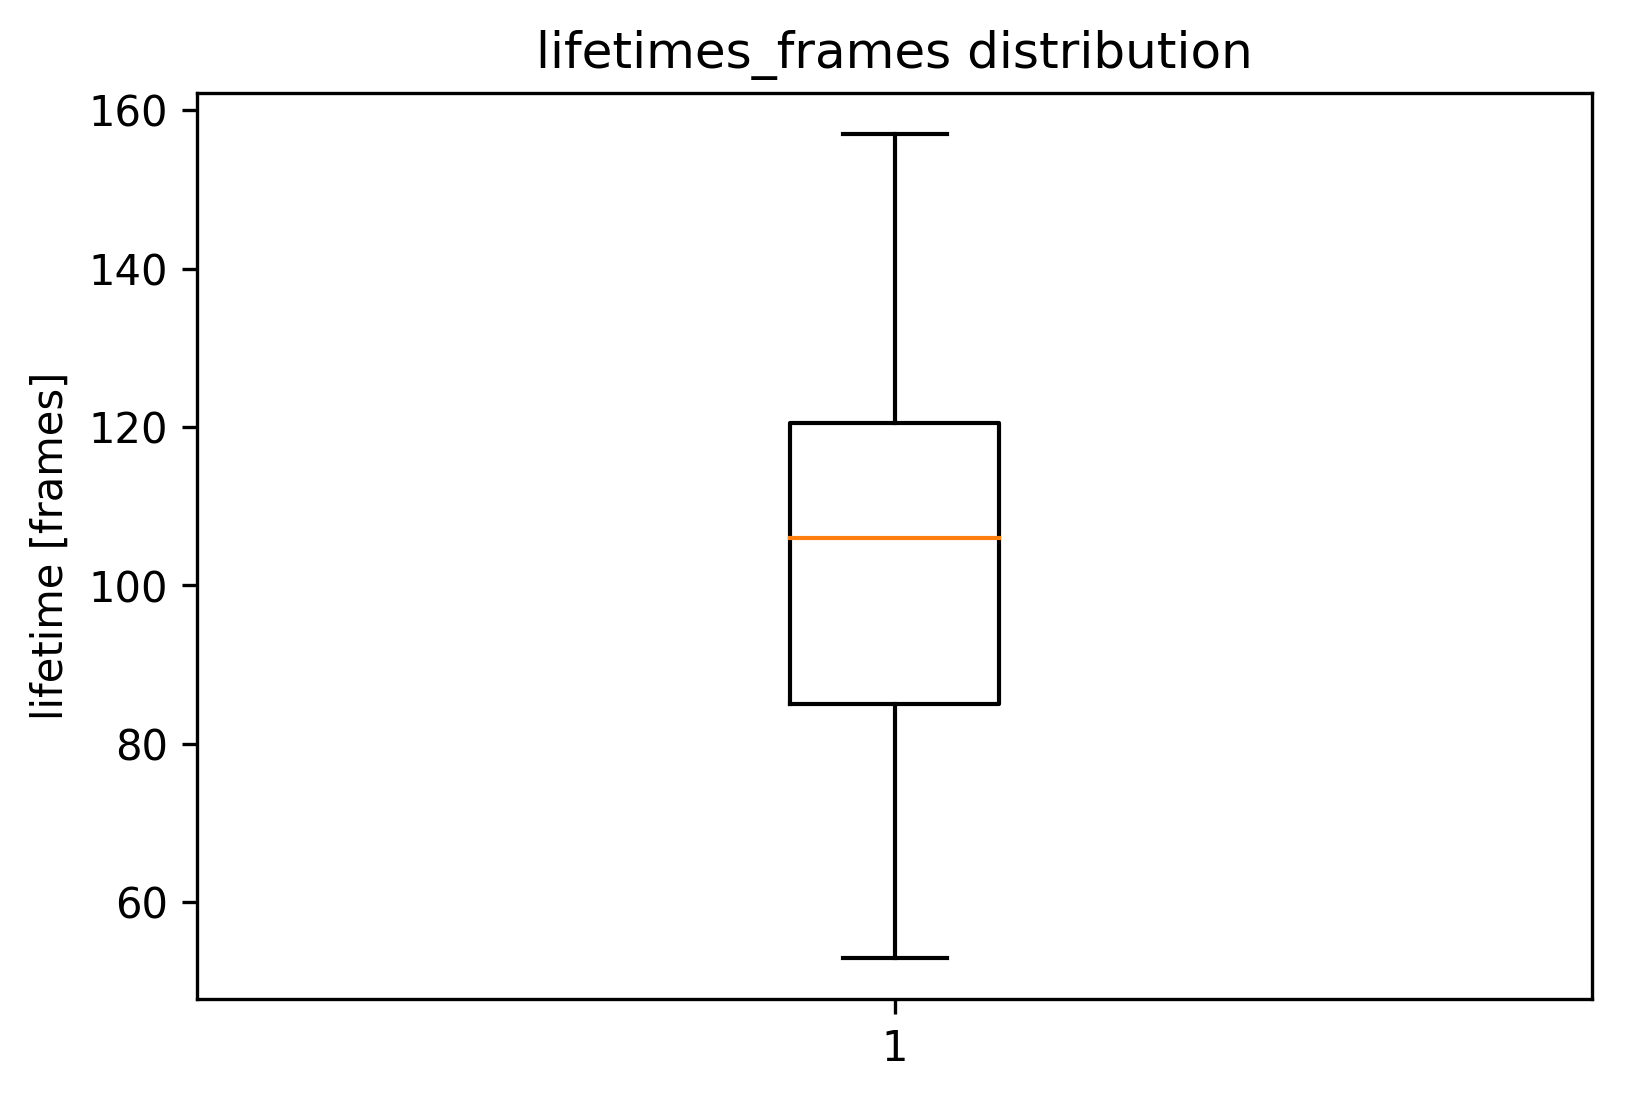

In [62]:
plt.figure(dpi=300)
plt.boxplot(lifetimes_frames)
plt.title('lifetimes_frames distribution')
plt.ylabel('lifetime [frames]')
outputFigurePath= outputpath+"plot_lifetime_frames_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_lifetime_seconds_distribution.png


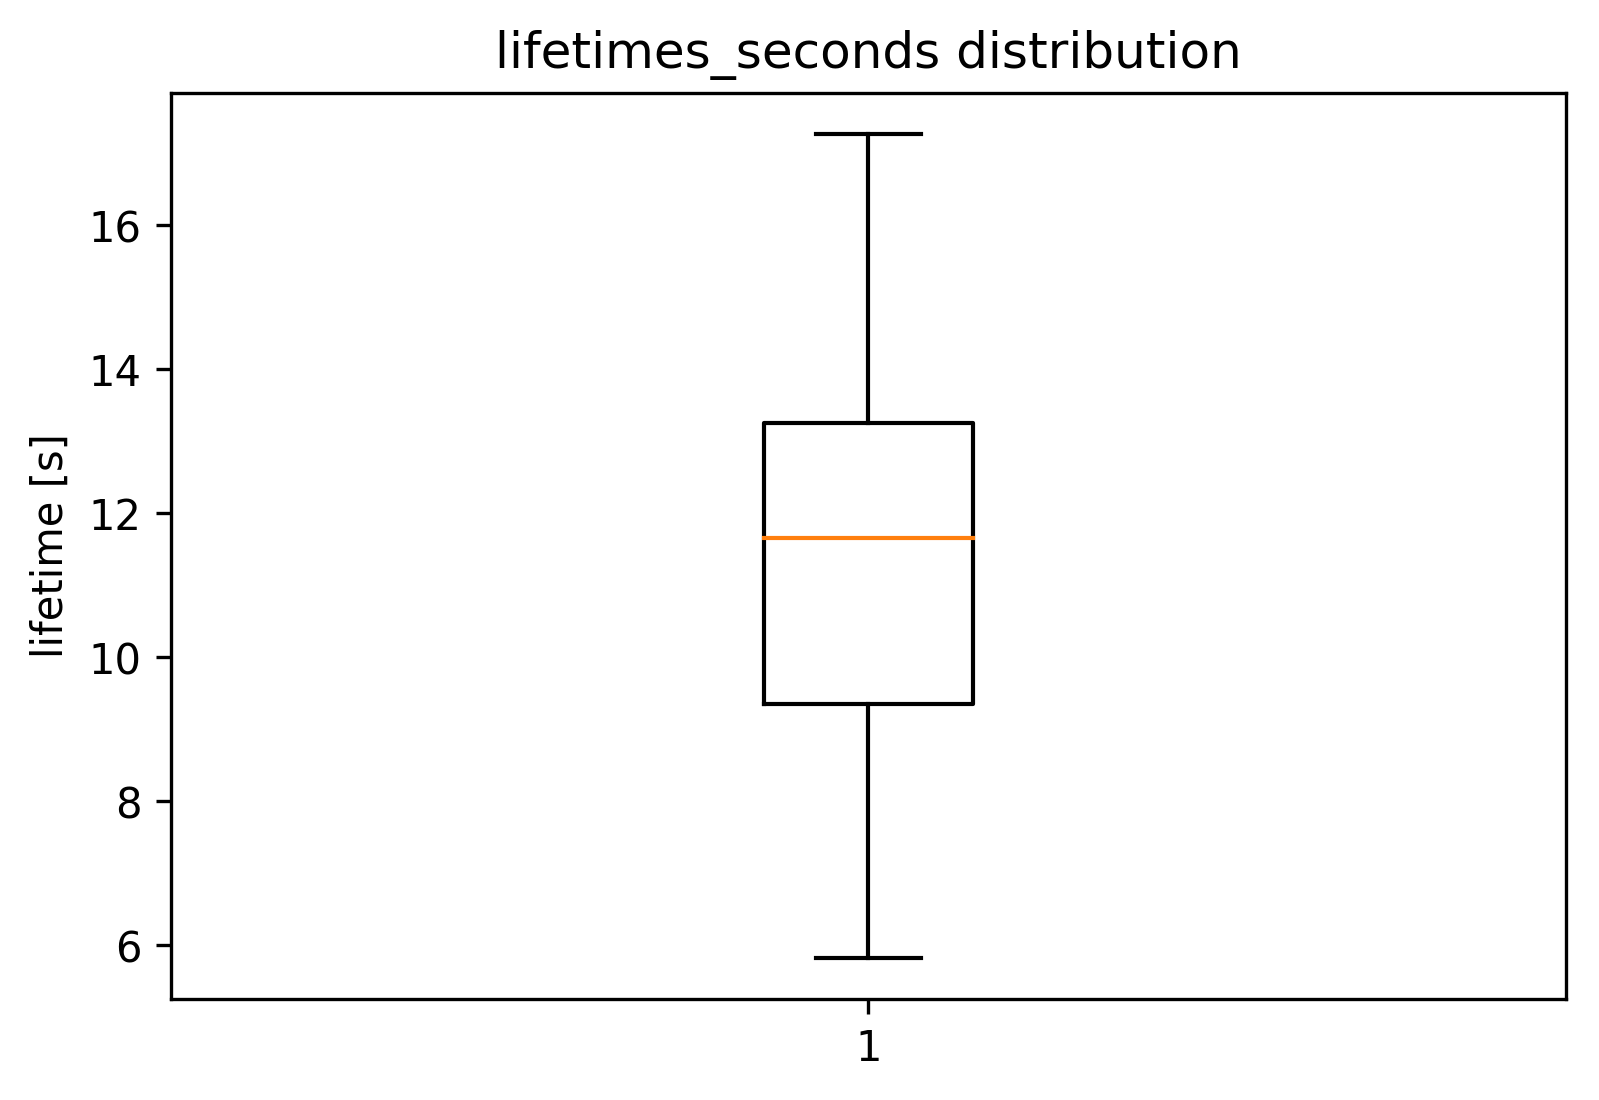

In [63]:
plt.figure(dpi=300)
plt.boxplot(lifetimes_seconds)
plt.title('lifetimes_seconds distribution')
plt.ylabel('lifetime [s]')
outputFigurePath= outputpath+"plot_lifetime_seconds_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Max Intensity Distribution

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_maxIntensity_distribution.png


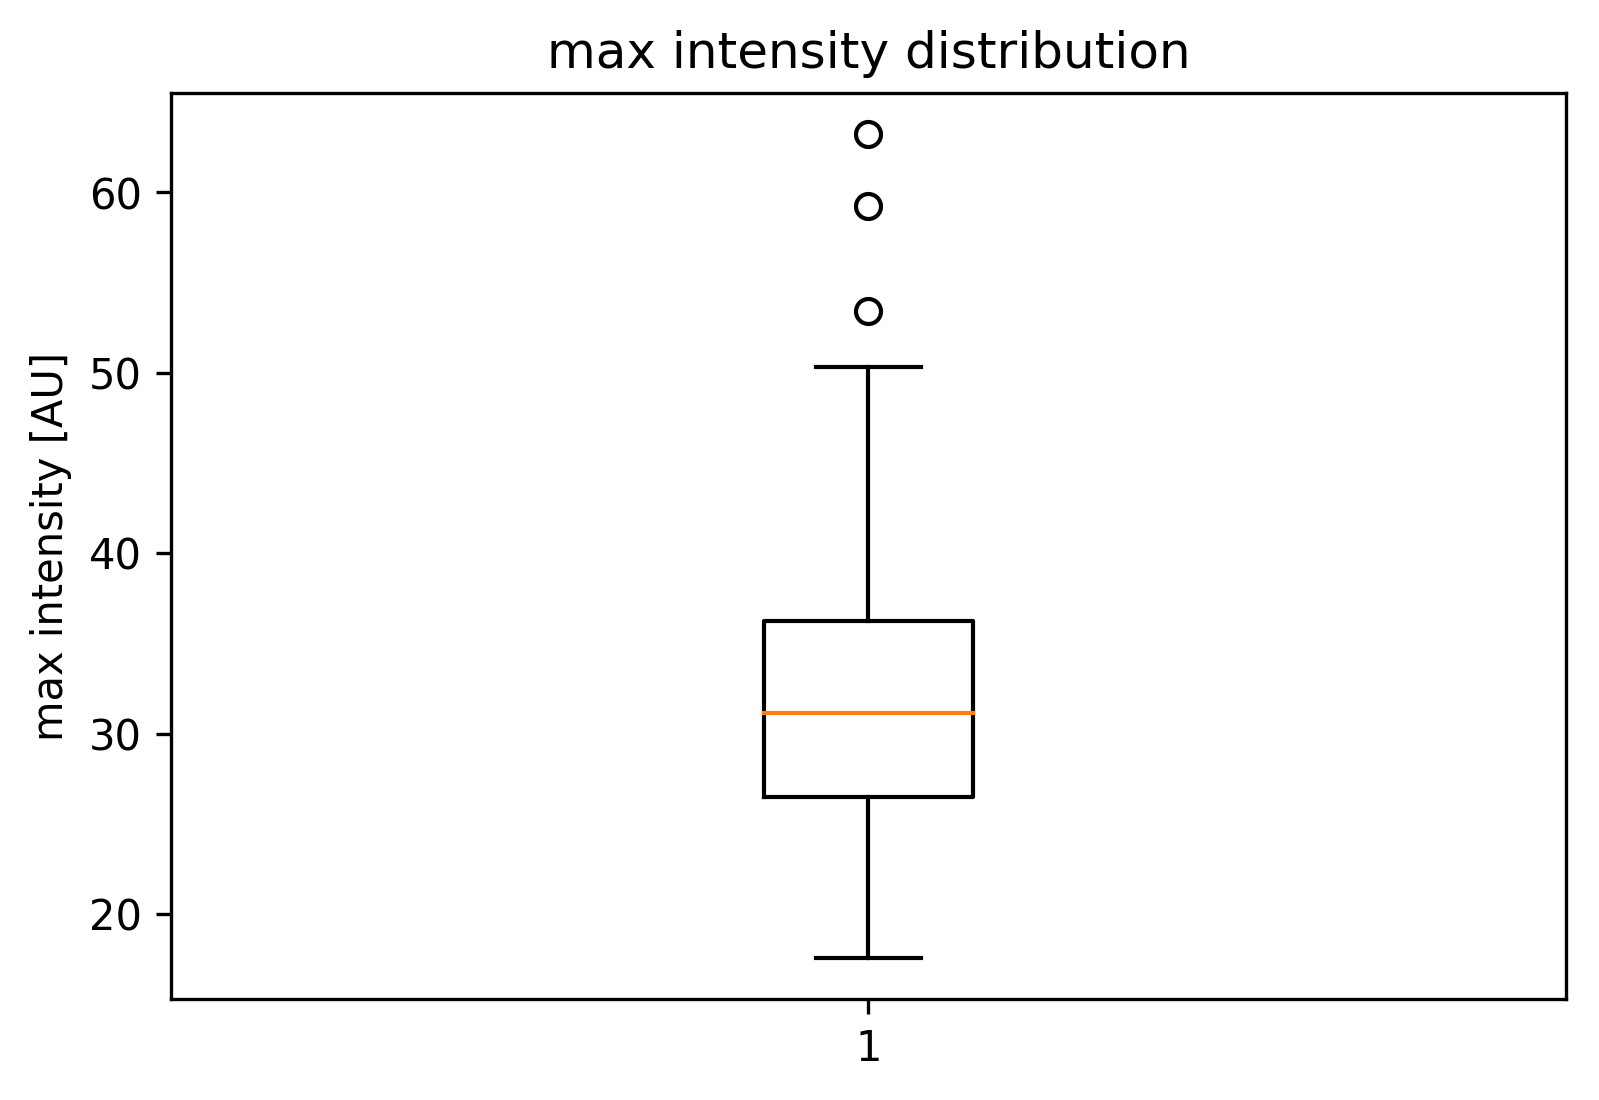

In [64]:
plt.figure(dpi=300)
plt.boxplot(maxIntensities)
plt.title('max intensity distribution')
plt.ylabel('max intensity [AU]')
outputFigurePath= outputpath+"plot_maxIntensity_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Intensities At Alignment Point

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_distance.png


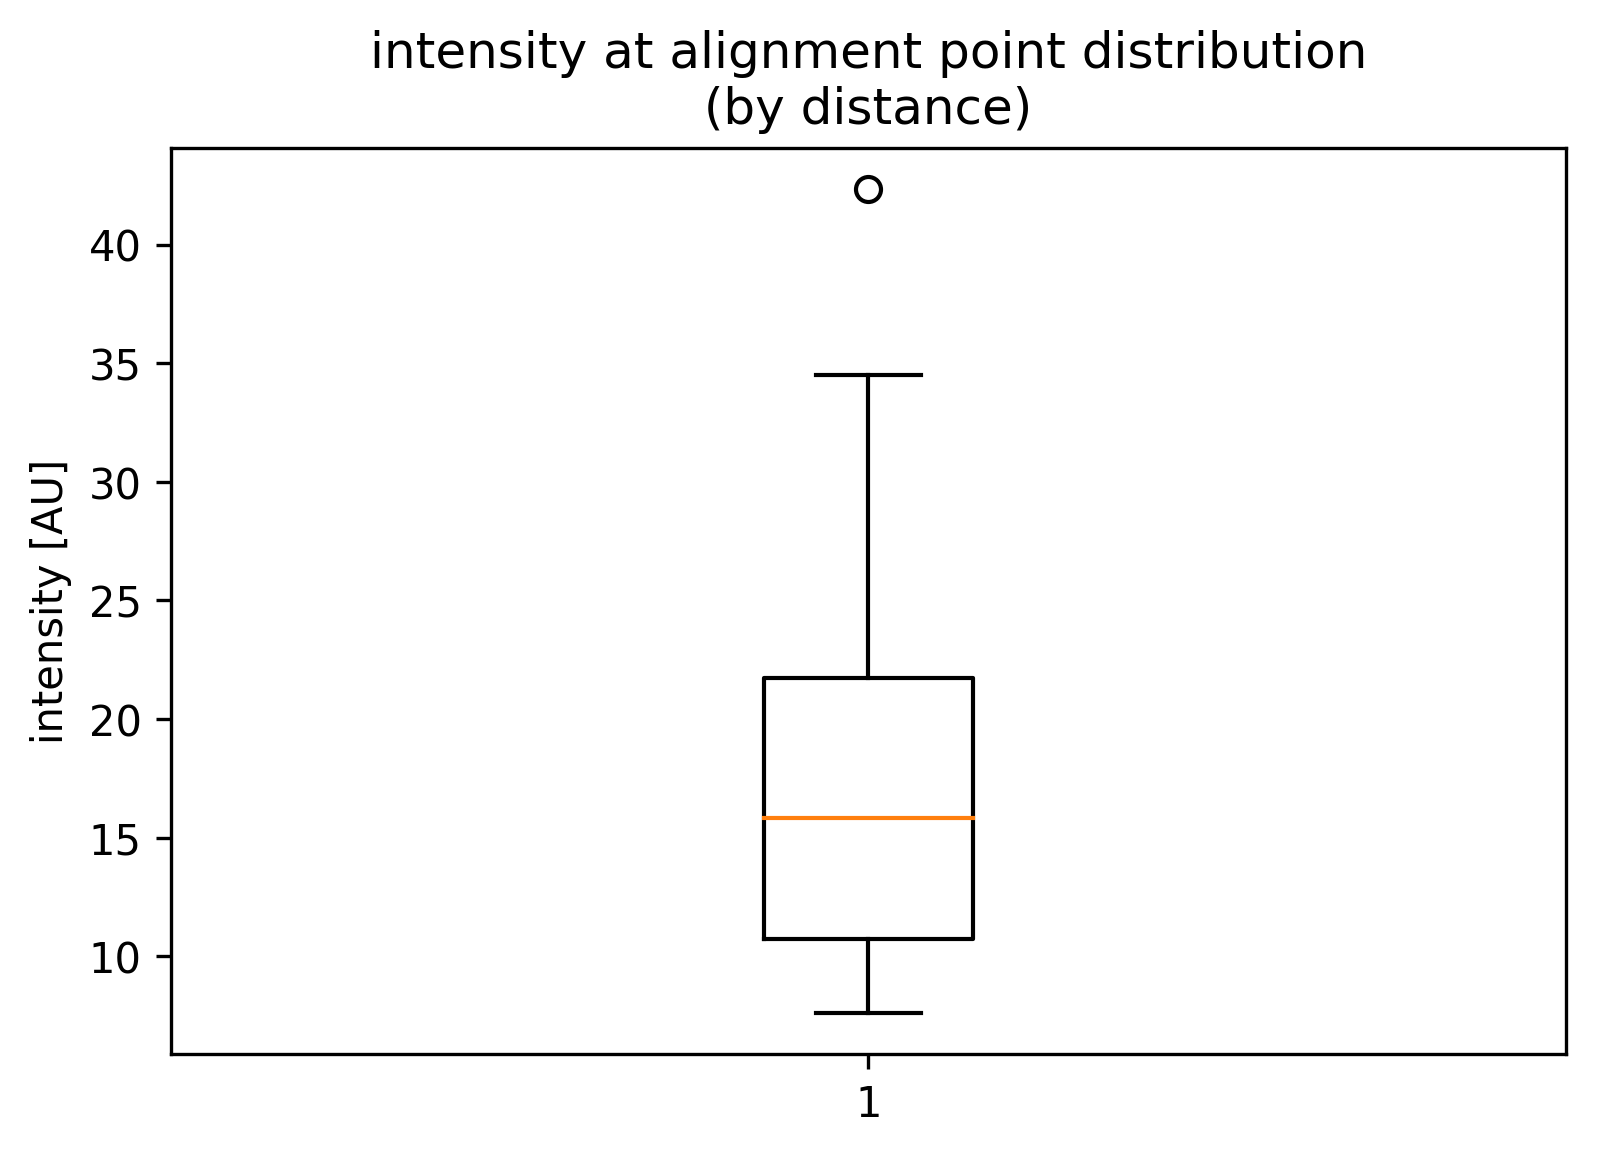

In [65]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byDistance)
plt.title('intensity at alignment point distribution\n(by distance)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_distance.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_intensity_raw.png


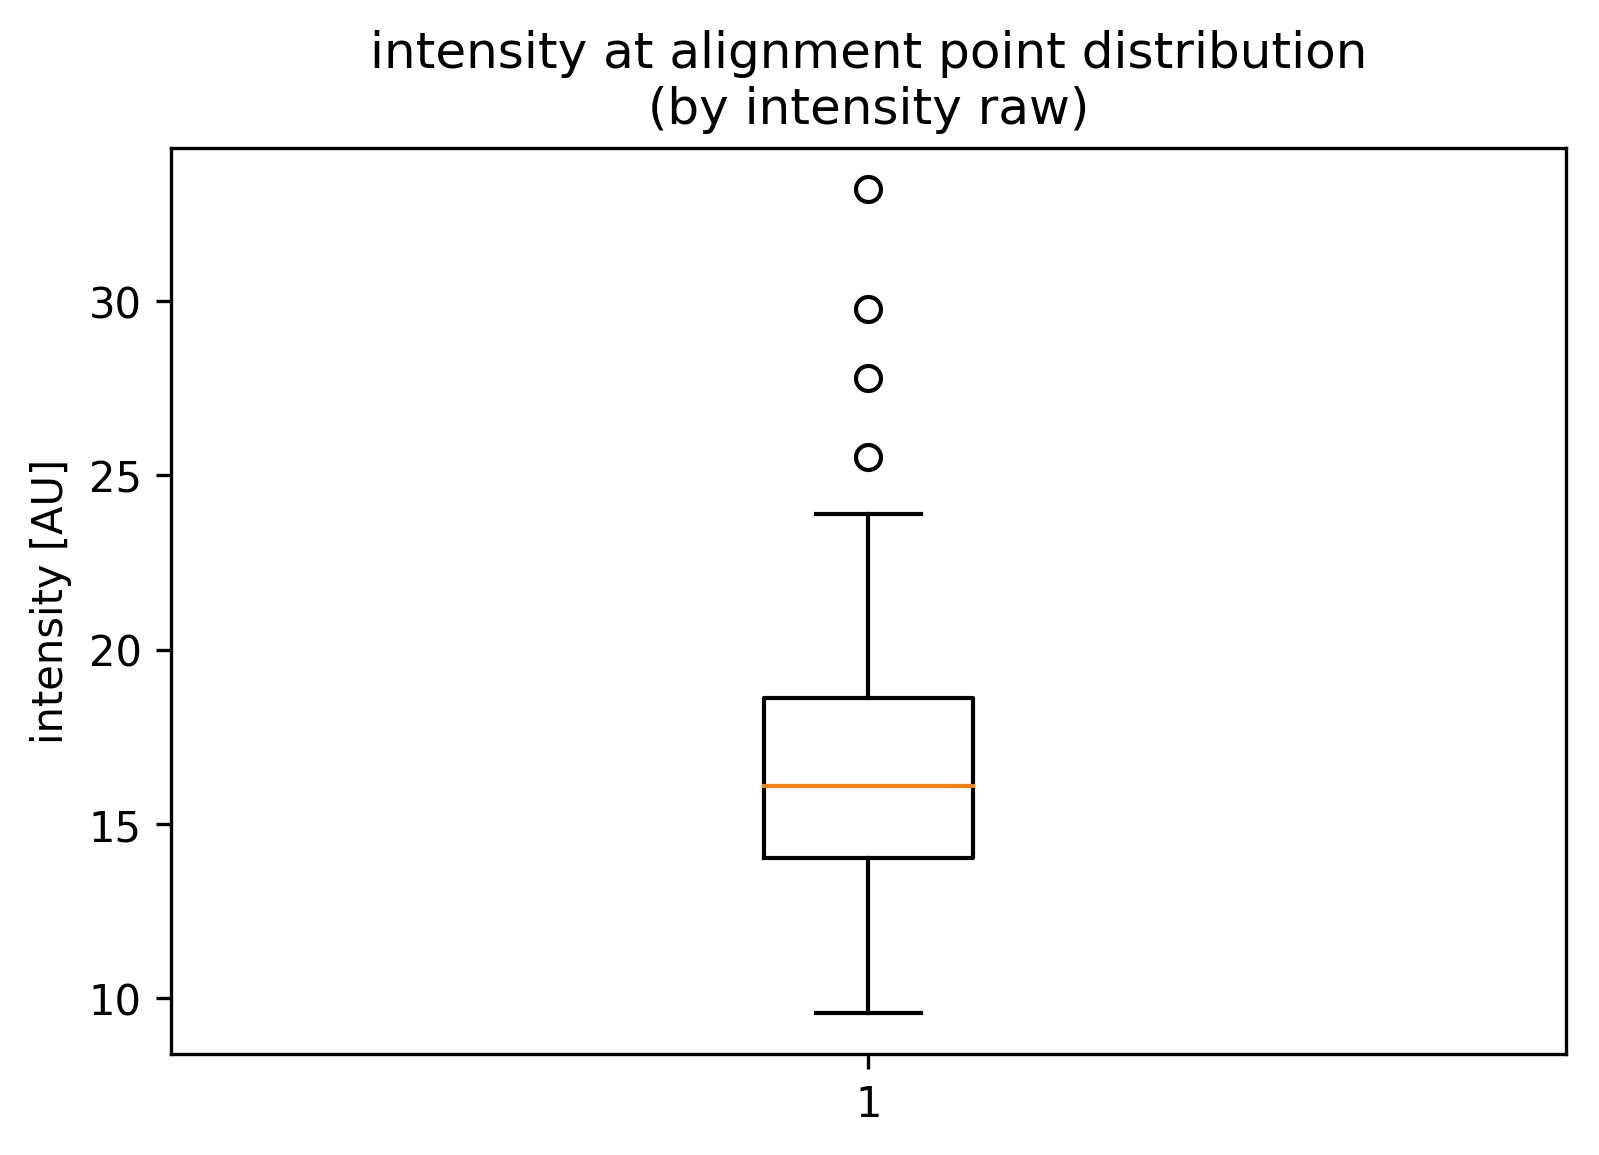

In [66]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byIntensity_raw)
plt.title('intensity at alignment point distribution\n(by intensity raw)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_intensity_raw.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_intensity_minMaxRescaled.png


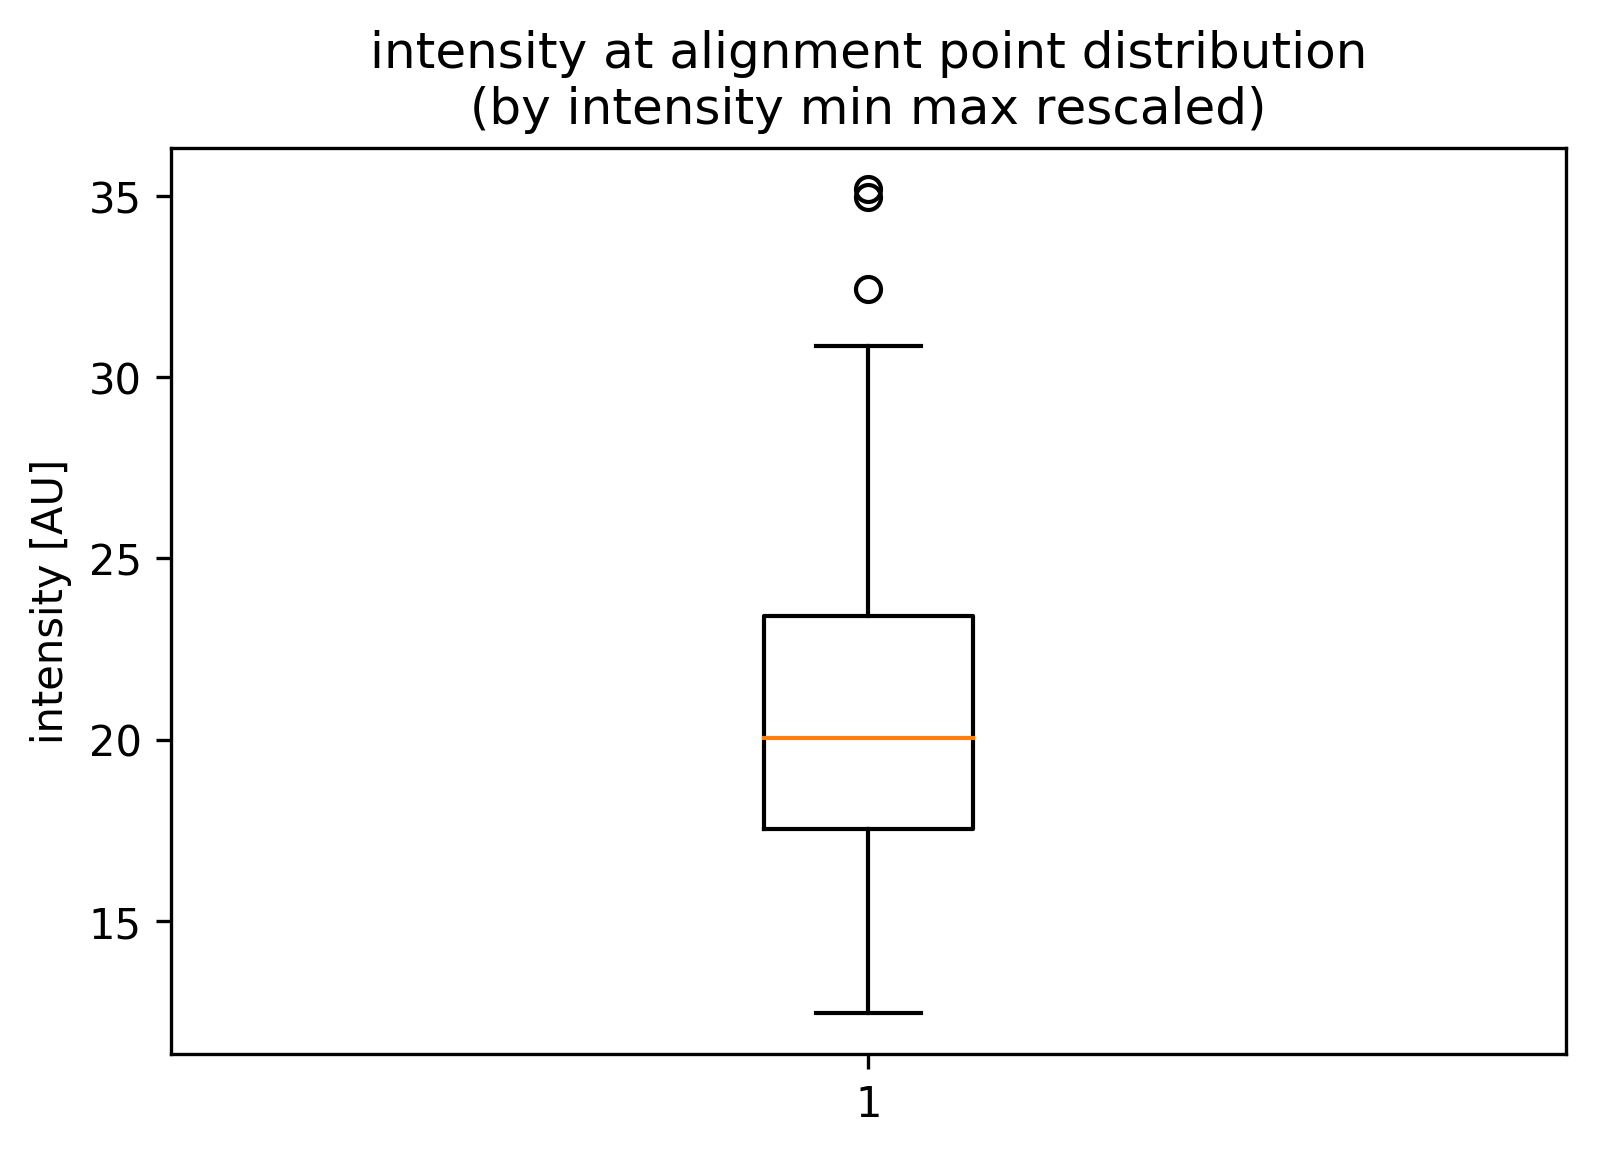

In [67]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byIntensity_minMaxRescaled)
plt.title('intensity at alignment point distribution\n(by intensity min max rescaled)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_intensity_minMaxRescaled.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_dist_and_intensity.png


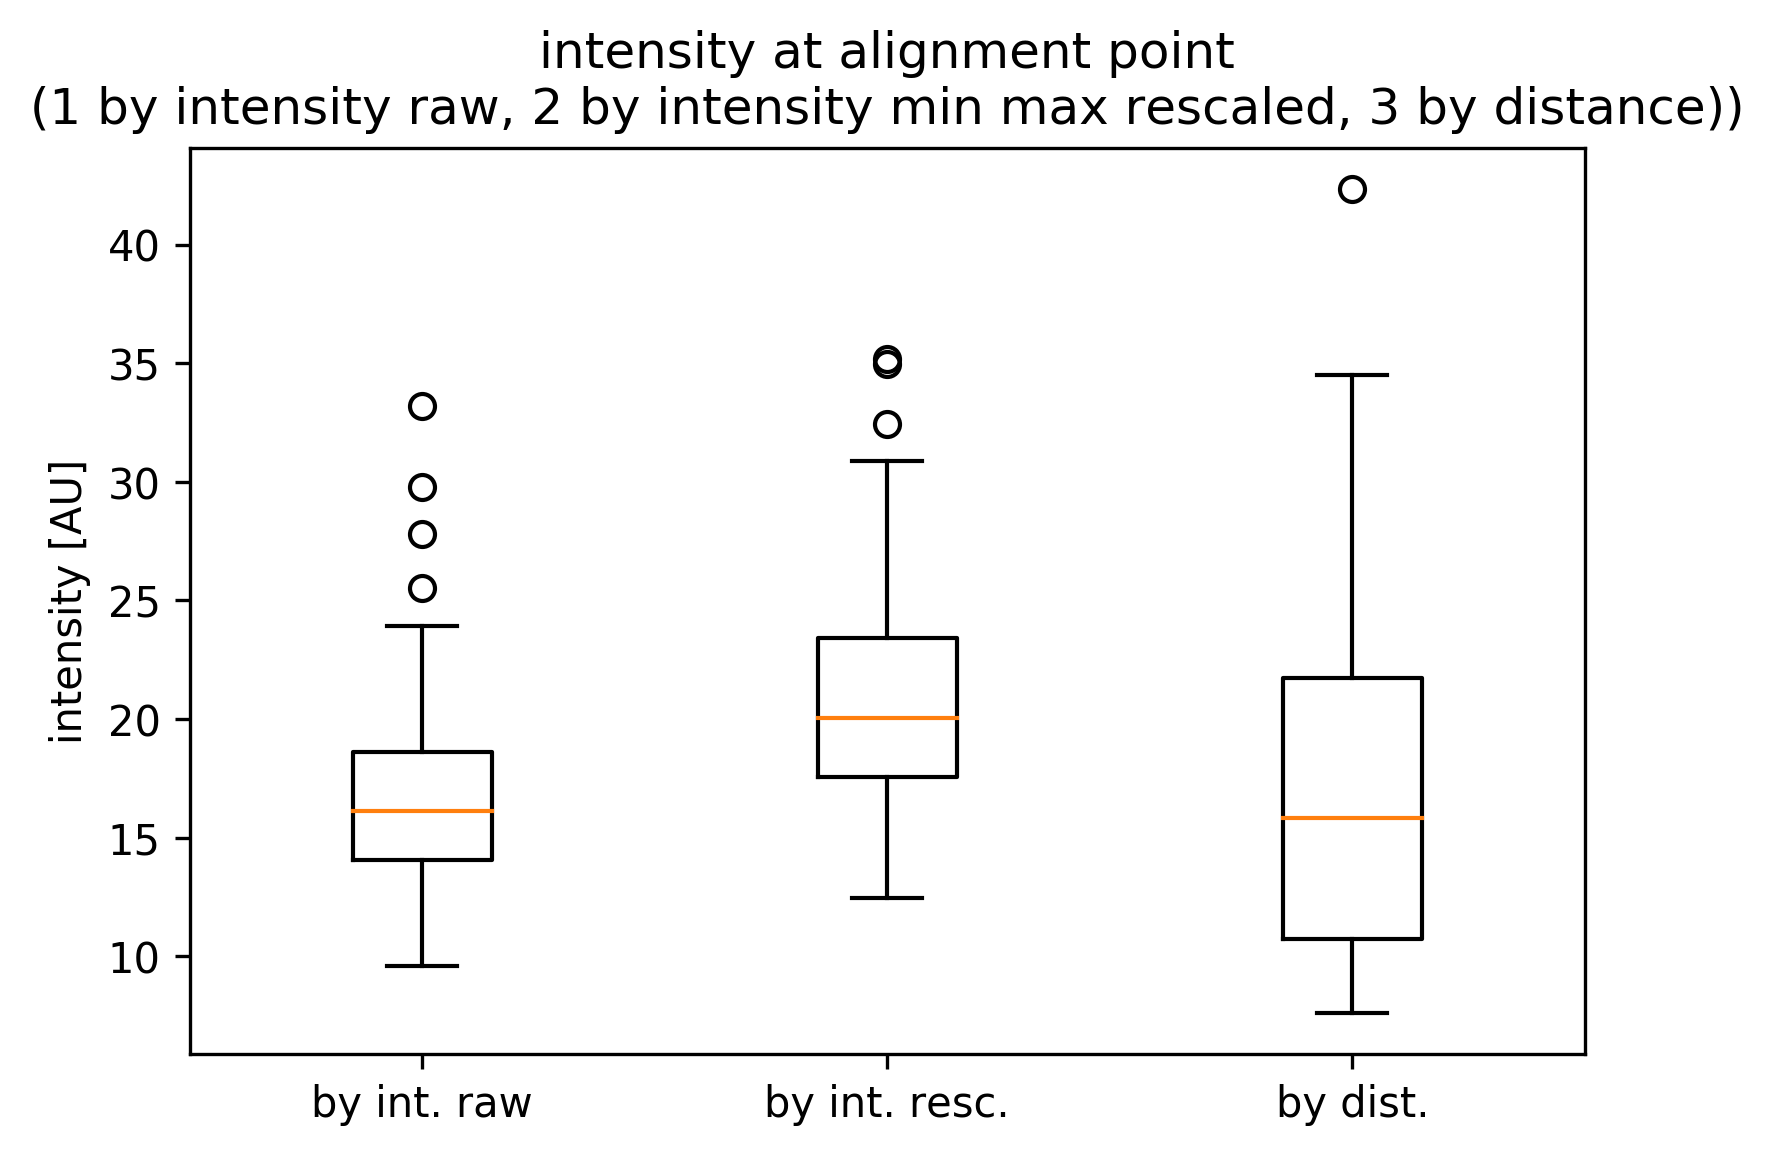

In [68]:
plt.figure(dpi=300)
plt.boxplot([intensities_atAlignmentPoint_byIntensity_raw,intensities_atAlignmentPoint_byIntensity_minMaxRescaled,intensities_atAlignmentPoint_byDistance])
plt.title('intensity at alignment point\n(1 by intensity raw, 2 by intensity min max rescaled, 3 by distance))')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_dist_and_intensity.png"
print(outputFigurePath)
#plt.xticklabels(["1","1","1"],rotation=45, fontsize=8)
plt.xticks([1, 2, 3], ['by int. raw', 'by int. resc.', 'by dist.'])
plt.savefig(outputFigurePath)

In [69]:
# The ∆t plots

In [70]:
intensities_atAlignmentPoint_byIntensity_raw_dt

[34.812820000000002,
 23.890999999999998,
 41.54278,
 22.26454,
 36.821680000000001,
 25.565149999999999,
 31.467359999999999,
 26.017849999999999,
 29.463759999999997,
 33.983069999999998,
 35.573349999999998,
 24.480910000000002,
 48.060020000000002,
 31.571650000000002,
 23.362939999999998,
 39.875820000000004,
 33.150149999999996,
 34.173290000000001,
 34.965440000000001,
 24.09094,
 24.89095,
 39.995229999999999,
 22.703310000000002,
 30.135720000000003,
 32.1036,
 19.26221,
 21.85005,
 13.982810000000001,
 26.02506,
 23.113670000000003,
 27.989380000000001,
 19.4574,
 21.967189999999999,
 21.623920000000002,
 28.74343,
 27.119350000000001,
 25.112120000000001,
 60.191450000000003,
 24.360150000000001,
 20.263929999999998,
 11.961960000000001,
 20.38833,
 17.019820000000003,
 33.740029999999997,
 32.298159999999996,
 23.93928,
 47.720390000000002]

In [71]:
intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt

[34.345269999999999,
 25.556529999999999,
 36.748290000000004,
 21.28988,
 37.018590000000003,
 22.44575,
 31.564759999999996,
 26.146840000000001,
 30.774899999999999,
 34.542290000000001,
 37.606090000000002,
 28.984679999999997,
 51.32208,
 28.482940000000003,
 23.418479999999999,
 35.06138,
 30.36693,
 31.528379999999999,
 35.329479999999997,
 20.119529999999997,
 21.558800000000002,
 44.838059999999999,
 23.45683,
 30.423990000000003,
 32.312570000000001,
 24.710899999999999,
 27.509809999999998,
 14.903720000000002,
 23.955479999999998,
 21.043849999999999,
 30.70825,
 21.329650000000001,
 21.463570000000001,
 16.779920000000001,
 28.035959999999999,
 27.342420000000001,
 24.818390000000001,
 59.947699999999998,
 27.149720000000002,
 19.300650000000001,
 13.633289999999999,
 19.414909999999999,
 15.525870000000001,
 36.893070000000002,
 33.002949999999998,
 24.764120000000002,
 50.094149999999999]

In [72]:
intensities_atAlignmentPoint_byDistance_dt

[7.8543799999999999,
 20.644729999999999,
 8.9830899999999989,
 7.2306499999999998,
 5.0137499999999999,
 11.109910000000001,
 7.9874899999999993,
 11.14476,
 6.8973199999999997,
 33.906509999999997,
 7.4752300000000007,
 11.12909,
 8.2964599999999997,
 6.9927600000000005,
 9.3718800000000009,
 36.176559999999995,
 18.278020000000001,
 18.369399999999999,
 7.6453499999999996,
 25.36308,
 6.2593899999999998,
 30.372790000000002,
 14.75811,
 7.9387600000000003,
 8.9320000000000004,
 12.784319999999999,
 29.766249999999999,
 5.9856199999999999,
 6.3433699999999993,
 15.568829999999998,
 6.6339800000000002,
 7.3045800000000005,
 7.209789999999999,
 6.4870999999999999,
 7.52597,
 6.5648600000000004,
 5.9447800000000006,
 6.8307600000000006,
 31.126109999999997,
 7.1345300000000007,
 11.040510000000001,
 8.3536000000000001,
 7.4792500000000004,
 33.016959999999997,
 28.851870000000002,
 10.498489999999999,
 7.7427800000000007]

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_dist_and_intensity.png


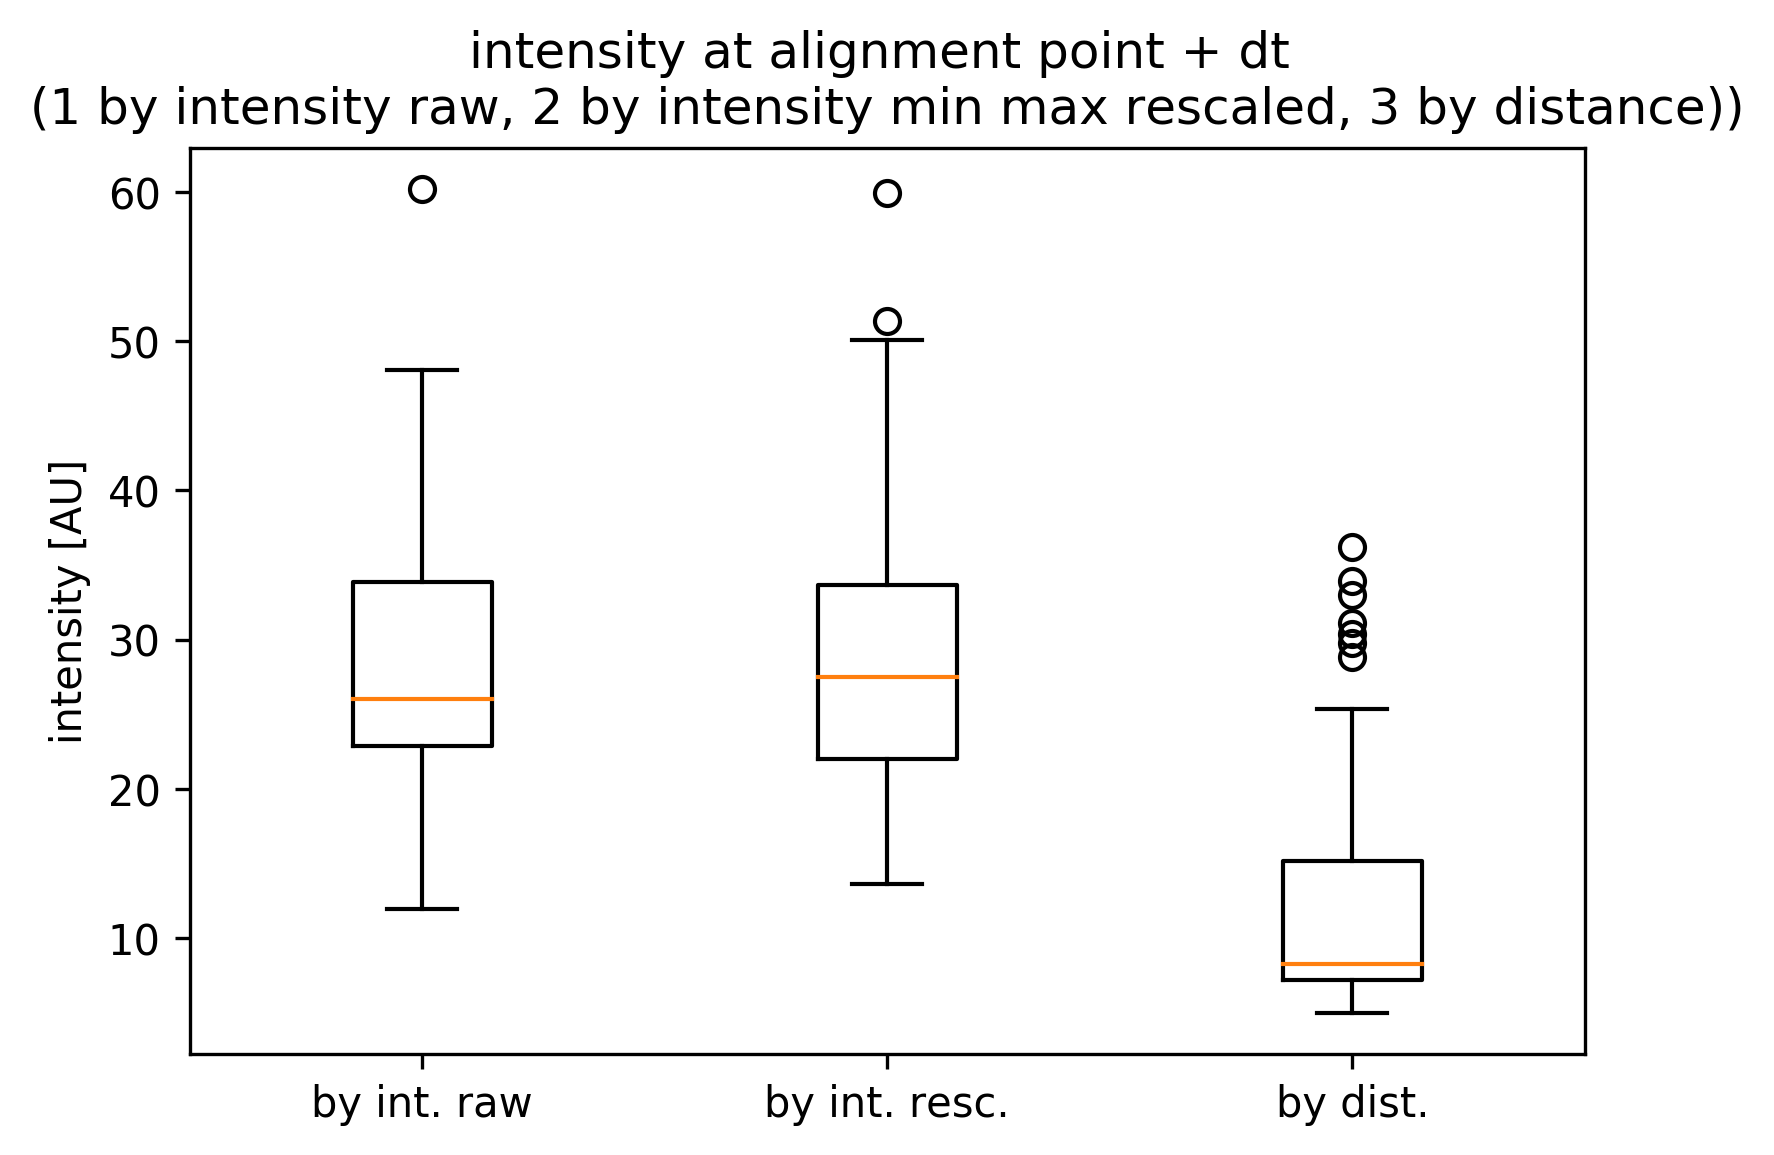

In [73]:
plt.figure(dpi=300)
plt.boxplot([intensities_atAlignmentPoint_byIntensity_raw_dt,intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt,intensities_atAlignmentPoint_byDistance_dt])
plt.title('intensity at alignment point + dt \n(1 by intensity raw, 2 by intensity min max rescaled, 3 by distance))')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_dist_and_intensity.png"
print(outputFigurePath)
#plt.xticklabels(["1","1","1"],rotation=45, fontsize=8)
plt.xticks([1, 2, 3], ['by int. raw', 'by int. resc.', 'by dist.'])
plt.savefig(outputFigurePath)
